In [38]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

data = datasets.load_breast_cancer()

data.target[[10, 11, 12]]
breast_cancer = pd.DataFrame(data['data'], columns=data['feature_names'])

breast_cancer['target'] = data['target']
breast_cancer['target'] = breast_cancer['target'].apply(lambda x: data['target_names'][x])
#Notice that there are no missing elements in this dataset
#All float values, so no need to convert to numerical attributes

breast_cancer['target']


0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
564    malignant
565    malignant
566    malignant
567    malignant
568       benign
Name: target, Length: 569, dtype: object

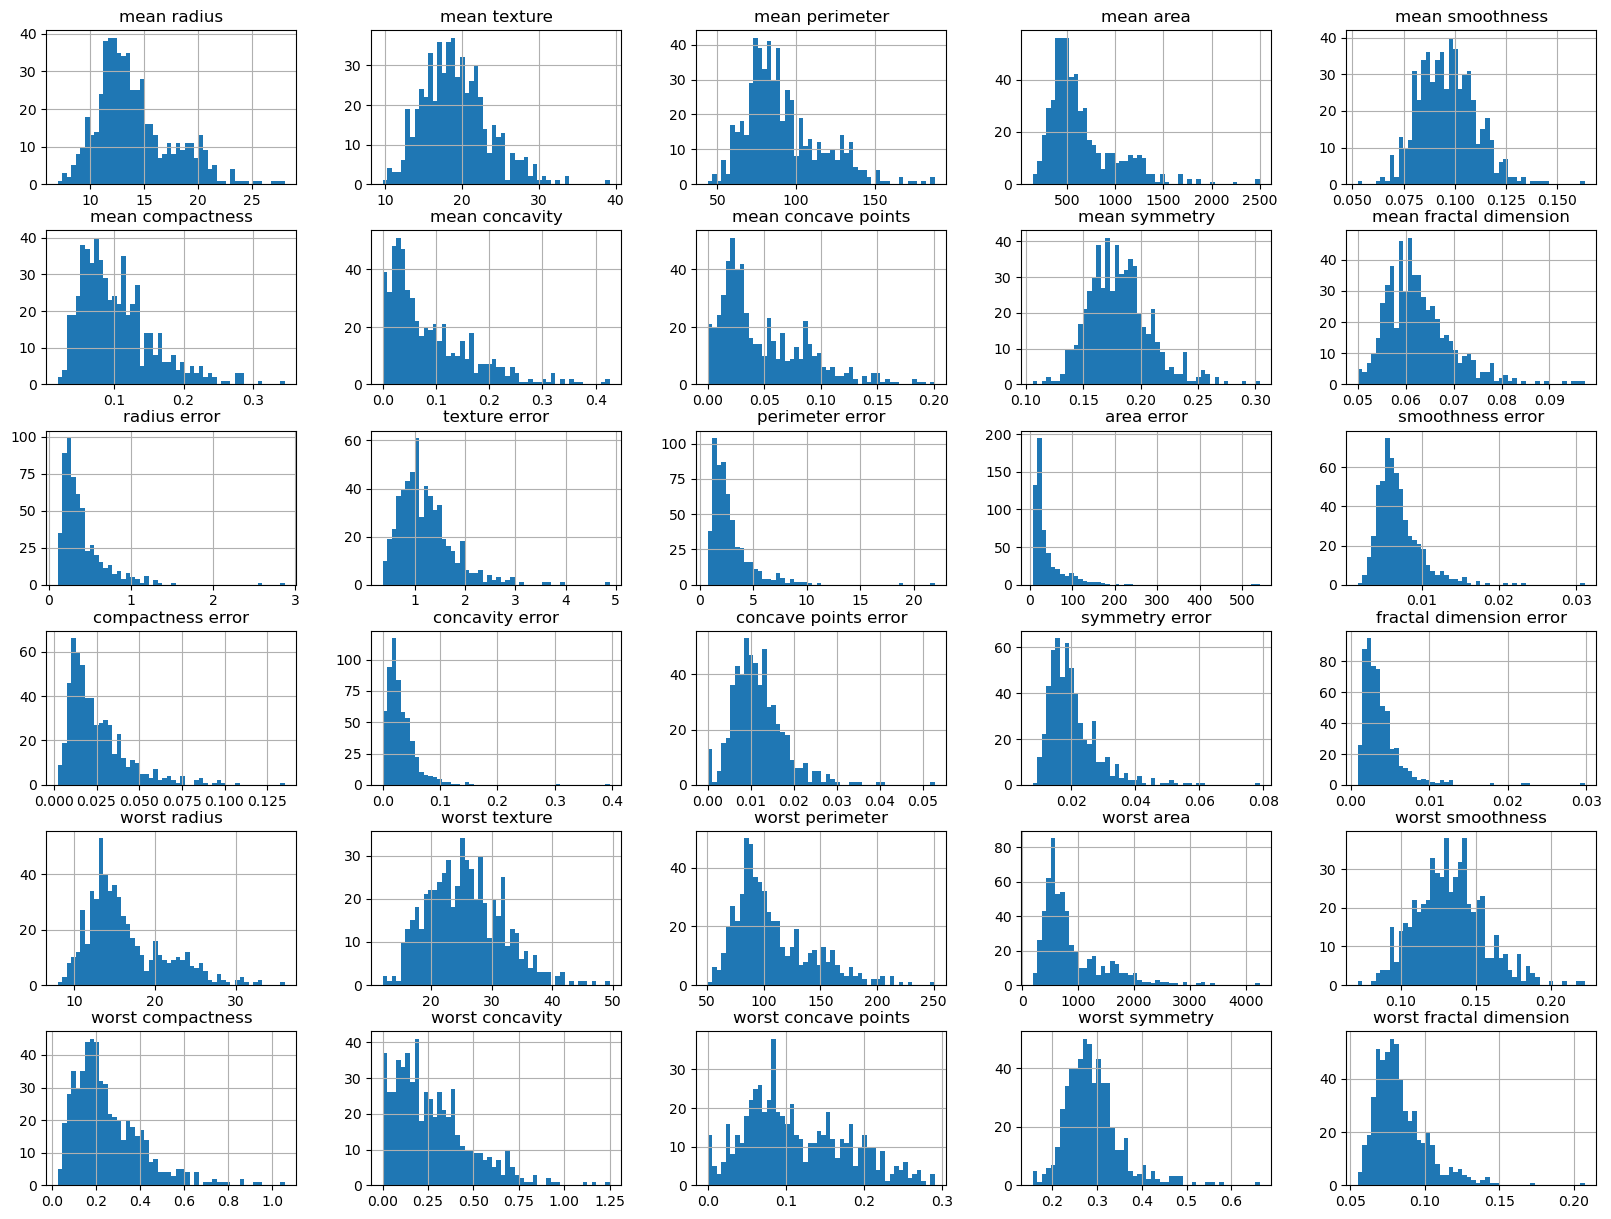

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [39]:

#Plot a histogram for each numerical attribute
breast_cancer.hist(bins=50, figsize=(20,15))
plt.show()

breast_cancer.keys()

In [40]:
data.describe()
corr_matrix = data.corr()
corr_matrix["mean area"].sort_values(ascending=False)

AttributeError: describe

array([[<Axes: xlabel='mean radius', ylabel='mean radius'>,
        <Axes: xlabel='worst area', ylabel='mean radius'>,
        <Axes: xlabel='mean area', ylabel='mean radius'>,
        <Axes: xlabel='mean fractal dimension', ylabel='mean radius'>],
       [<Axes: xlabel='mean radius', ylabel='worst area'>,
        <Axes: xlabel='worst area', ylabel='worst area'>,
        <Axes: xlabel='mean area', ylabel='worst area'>,
        <Axes: xlabel='mean fractal dimension', ylabel='worst area'>],
       [<Axes: xlabel='mean radius', ylabel='mean area'>,
        <Axes: xlabel='worst area', ylabel='mean area'>,
        <Axes: xlabel='mean area', ylabel='mean area'>,
        <Axes: xlabel='mean fractal dimension', ylabel='mean area'>],
       [<Axes: xlabel='mean radius', ylabel='mean fractal dimension'>,
        <Axes: xlabel='worst area', ylabel='mean fractal dimension'>,
        <Axes: xlabel='mean area', ylabel='mean fractal dimension'>,
        <Axes: xlabel='mean fractal dimension', ylabel=

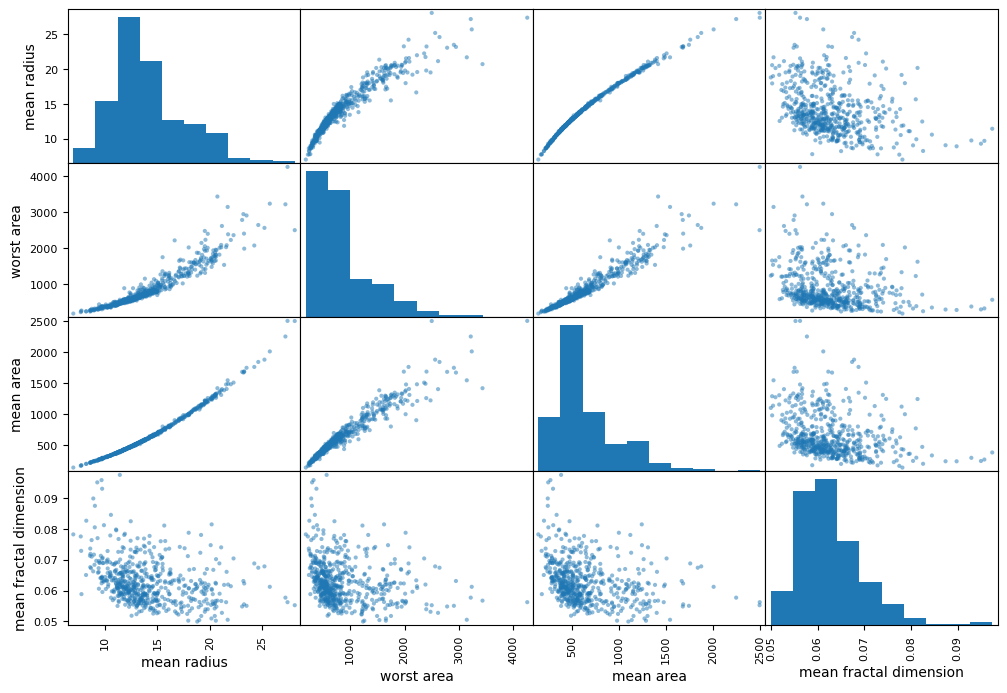

In [ ]:
from pandas.plotting import scatter_matrix

attributes=["mean radius", "worst area", "mean area", "mean fractal dimension",]

scatter_matrix(data[attributes], figsize=(12,8))

In [79]:
#Creating a testset with just numpy, sklearn has this built in

'''
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

np.random.seed(3)
train_set, test_set = split_train_test(data, 0.1)

len(train_set)
len(test_set)
'''
breast_cancer = breast_cancer.query("target == 'malignant' | target == 'benign'")[['mean radius', 'worst radius', 'target']]


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(breast_cancer, test_size = 0.1, random_state= 42)



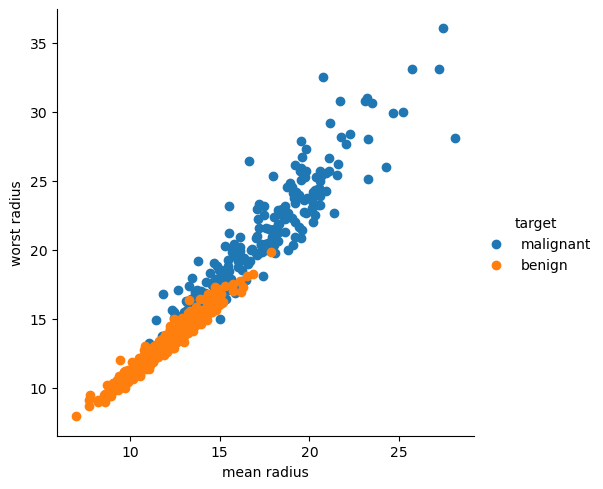

In [ ]:
import seaborn as sns

sns.FacetGrid(breast_cancer, hue='target', height=5).map(plt.scatter, 'mean radius', 'worst radius').add_legend()

In [73]:




from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
X = train_set.drop(columns=['target'])
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = train_set['target']
y_test = test_set['target']
y = [1 if x == 'malignant' else 0 for x in y]
logistic_regression.fit(X, y)

#Once we have learned the parameters, take all points in 2D space, predict the probable class of every such point, and based on these predictions, colour the point

LogisticRegression()

In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(logistic_regression, X, y , cv=3, scoring="accuracy")

array([0.96491228, 0.91812865, 0.87058824])

In [77]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(logistic_regression, X_scaled, y, cv=3)

y_train_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

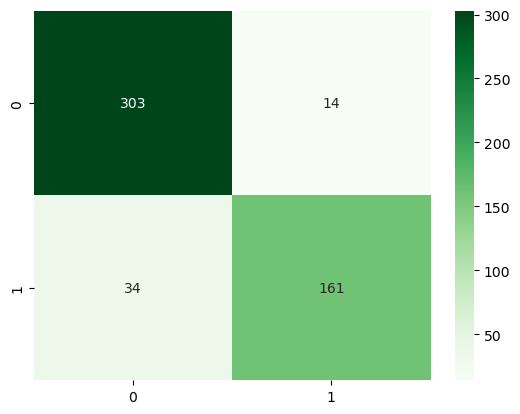

array([[303,  14],
       [ 34, 161]], dtype=int64)

In [80]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y, y_train_pred)

sns.heatmap(cm,cmap = 'Greens',annot=True, fmt='.3g')
plt.show()

cm